In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from xmovie import Movie
%matplotlib inline

In [ ]:
ds = xr.open_dataset("data/output.nc")
ds = ds.assign_coords(time=ds.time.astype("float")*1e-9/86400)

In [2]:
ds = xr.open_dataset("data/output.nc")
ds = ds.assign_coords(time=ds.time.astype("float")*1e-9/86400)
ds = ds.interp(xF=ds.xC,yF=ds.yC,zF=ds.zC)
ds = ds.assign(Ro = (ds.v.differentiate("xC")-ds.u.differentiate("yC"))/1.26e-4)

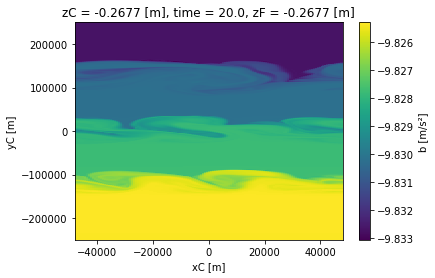

In [8]:
ds.b.isel(time=20,zC=-1).plot()

In [9]:
b = ds.b.isel(time=0).mean("xC")

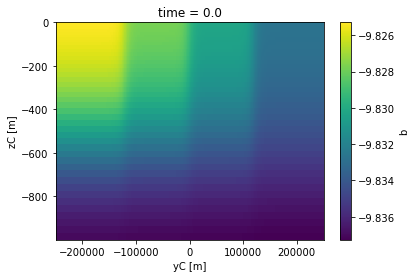

In [10]:
b.plot()

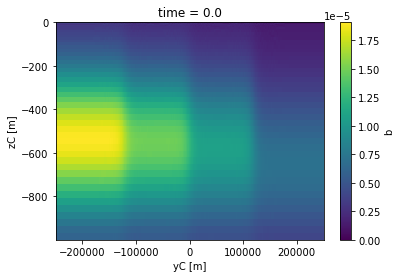

In [11]:
b.differentiate("zC").plot()

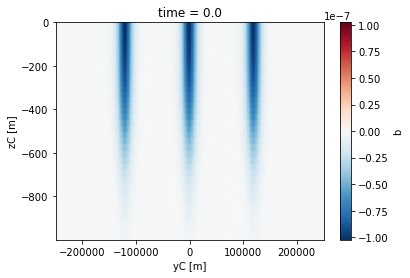

In [12]:
b.differentiate("yC").plot()

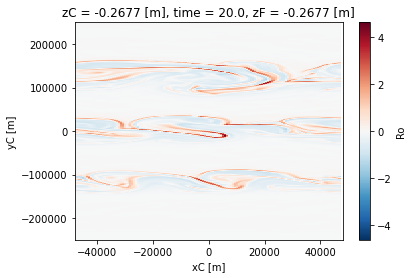

In [16]:
ds.Ro.isel(time=20).sel(zC=0,method="nearest").plot()

In [17]:
mov = Movie(ds.Ro.sel(zC=0,method="nearest"))
mov.save('img/movie.mp4',framerate=2,overwrite_existing=True)

/autofs/nas1/home/isimoesdesousa/programs/mambaforge/envs/pangeo-notebook/lib/python3.9/site-packages/xmovie/core.py:46: UserWarning: No `vmin` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmin` to avoid this step
  warnings.warn(
/autofs/nas1/home/isimoesdesousa/programs/mambaforge/envs/pangeo-notebook/lib/python3.9/site-packages/xmovie/core.py:53: UserWarning: No `vmax` provided. Data limits are calculated from input. Depending on the input this can take long. Pass `vmax` to avoid this step
  warnings.warn(


Movie created at movie.mp4


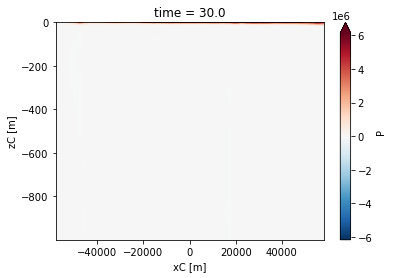

In [12]:
ds.P.isel(time=-1).mean("yC").plot(robust=True)

In [ ]:
mov = Movie(ds.P.sel(yC=0,method="nearest"))
mov.save('img/movie_P.mp4',framerate=2,overwrite_existing=True)

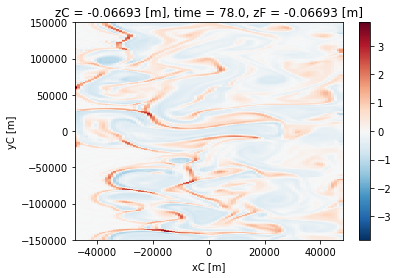

In [18]:
%matplotlib inline
fig,ax = plt.subplots()
Ro.sel(zC=0,method="nearest").isel(time=-1).plot()

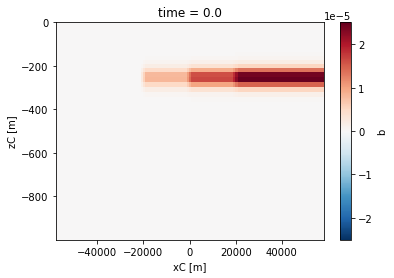

In [5]:
ds.b.isel(time=0).mean("yC").differentiate("zC").plot()

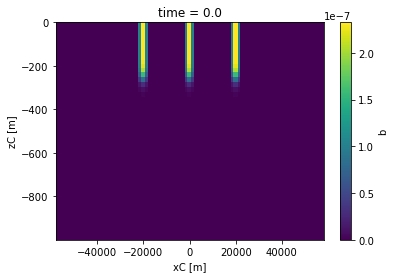

In [6]:
ds.b.isel(time=0).mean("yC").differentiate("xC").plot()

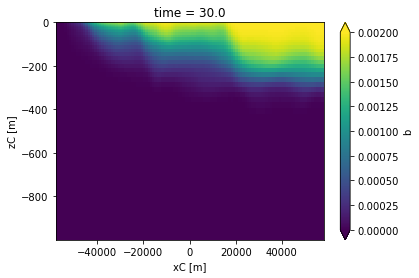

In [7]:
ds.b.isel(time=-1).mean("yC").plot(vmin=0,vmax=0.002)

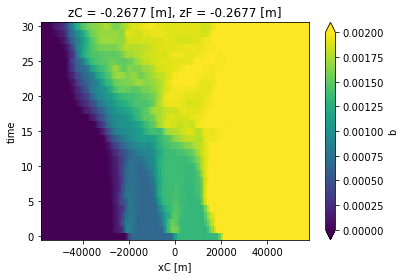

In [18]:
ds.b.mean("yC").sel(zC=0,method="nearest").plot(robust=True,vmin=0,vmax=0.002)

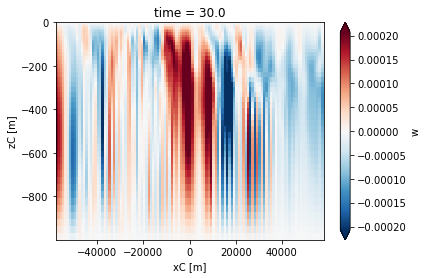

In [17]:
ds.mean(["yC"]).w.isel(time=-1).plot(robust=True)

In [35]:
sigma = (1025+1025*ds.b/9.8)-1000

In [41]:
((sigma-sigma.sel(zC=0,method="nearest"))<0.01).mean(["])

<xarray.DataArray (time: 77, yC: 300, xC: 96)>
array([[[-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        ...,
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915]],

       [[-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
...
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915]],

       [[-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        ...,
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915],
        [-991.81915, -991.81915, -991.81915, ..., -991.81915,
         -991.81915, -991.81915]]], dtype=float32)
Coordinates:
  * xC       (xC) float32 -4.75e+04 -4.65e+04 -4.55e+04 ... 4.65e+04 4.75e+04
  * yC       (yC) float32 -1.495e+05 -1.485e+05 ... 1.485e+05 1.495e+05
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 5.0 ... 72.0 73.0 74.0 75.0 76.0
    xF       (xC) float32 -4.75e+04 -4.65e+04 -4.55e+04 ... 4.65e+04 4.75e+04
    yF       (yC) float32 -1.495e+05 -1.485e+05 ... 1.485e+05 1.495e+05

In [35]:
x,y,z = np.meshgrid(np.arange(-48,48),np.arange(-240,240),np.arange(-1000,0+50,50))

In [36]:
x = x*1e3
y = y*1e3

In [44]:
meters = 1
kilometers = 1e3

cz = -250*meters # thermocline depth
L = 100*kilometers
front = lambda x, y, z, cx: ((np.tanh(0.03*(z-cz))+1)/2)*(np.tanh(0.5*(x-(cx+np.sin(2*np.pi*y/L)*2*kilometers))+1))/2
B = lambda x,y,z: (front(x,y,z,0*kilometers)+front(x,y,z,-20*kilometers)+front(x,y,z,20*kilometers))/3/5

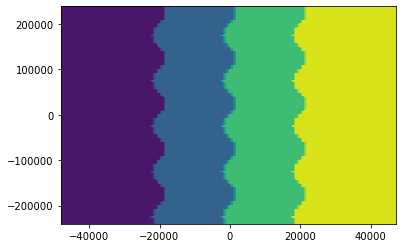

In [45]:
plt.contourf(x[:,:,-1],y[:,:,-1],B(x,y,z)[:,:,-1])

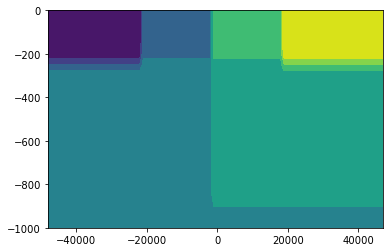

In [46]:
plt.contourf(x[0,:,:],z[0,:,:],B(x,y,z)[0,:,:])

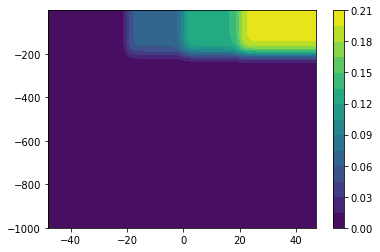

In [60]:


cz = -200
B = (F(x,z,0,cz)+F(x,z,-20,cz)+F(x,z,20,cz))/3/5

fig,ax = plt.subplots()
C = ax.contourf(x,z,B,levels=5*3)
fig.colorbar(C)